In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\KumarMayank\Projects\Floating Debris\all_data.csv')
df['label']=df['label']-1
df = df.drop(['Location','Date','Sentinel-2','Longitude','Latitude'],axis=1)
lc = df.pop(df.columns[-1])
df.insert(0,'label',lc)
df.to_csv('new_test',index=False)
# Shuffle the rows randomly
df = df.sample(frac=1, random_state=42) 
df.to_csv('new_test.csv', index=False)

In [3]:
df.head()

,label,B1,B2,B3,B4,B5,B6,B7,B8,B8A,...,EVI2,GNDVI,MCARI,MSI,NDMI,NBR,NDSI,SAVI,OSI,PNDVI
8913,4,0.034735,0.055885,0.051389,0.058892,0.062775,0.048423,0.050950,0.059959,0.044512,...,0.002289,0.076968,0.001455,0.431533,0.397104,0.564817,0.330229,0.002586,1.973362,-0.469682
34408,5,0.053651,0.034511,0.031840,0.013273,0.013414,0.013022,0.011848,0.010189,0.009170,...,-0.007231,-0.515130,0.003865,0.320179,0.514946,0.601275,0.814119,-0.008836,1.307201,-0.773099
46353,5,0.031068,0.032013,0.029397,0.009378,0.008480,0.007786,0.007966,0.007560,0.005938,...,-0.004290,-0.590853,0.002885,0.200492,0.665984,0.585303,0.901929,-0.005275,1.211211,-0.807005
45931,5,0.089263,0.139251,0.160993,0.147108,0.099965,0.095406,0.094255,0.136276,0.086865,...,-0.020257,-0.083145,-0.038849,0.056983,0.892179,0.924657,0.907970,-0.020741,2.212562,-0.533003
35087,5,0.060063,0.118082,0.124176,0.107934,0.102423,0.102832,0.103136,0.101790,0.095013,...,-0.012189,-0.099067,-0.001382,0.165113,0.716572,0.851704,0.761576,-0.012985,1.965666,-0.549583


In [4]:
df

,label,B1,B2,B3,B4,B5,B6,B7,B8,B8A,...,EVI2,GNDVI,MCARI,MSI,NDMI,NBR,NDSI,SAVI,OSI,PNDVI
8913,4,0.034735,0.055885,0.051389,0.058892,0.062775,0.048423,0.050950,0.059959,0.044512,...,0.002289,0.076968,0.001455,0.431533,0.397104,0.564817,0.330229,0.002586,1.973362,-0.469682
34408,5,0.053651,0.034511,0.031840,0.013273,0.013414,0.013022,0.011848,0.010189,0.009170,...,-0.007231,-0.515130,0.003865,0.320179,0.514946,0.601275,0.814119,-0.008836,1.307201,-0.773099
46353,5,0.031068,0.032013,0.029397,0.009378,0.008480,0.007786,0.007966,0.007560,0.005938,...,-0.004290,-0.590853,0.002885,0.200492,0.665984,0.585303,0.901929,-0.005275,1.211211,-0.807005
45931,5,0.089263,0.139251,0.160993,0.147108,0.099965,0.095406,0.094255,0.136276,0.086865,...,-0.020257,-0.083145,-0.038849,0.056983,0.892179,0.924657,0.907970,-0.020741,2.212562,-0.533003
35087,5,0.060063,0.118082,0.124176,0.107934,0.102423,0.102832,0.103136,0.101790,0.095013,...,-0.012189,-0.099067,-0.001382,0.165113,0.716572,0.851704,0.761576,-0.012985,1.965666,-0.549583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,5,0.029909,0.035411,0.031161,0.010835,0.008020,0.008032,0.007946,0.008491,0.006885,...,-0.005521,-0.571735,0.000610,0.055209,0.895358,0.614399,0.970359,-0.006772,1.185978,-0.802307
38158,5,0.027207,0.035663,0.032453,0.012346,0.008450,0.005874,0.007659,0.014033,0.006040,...,0.003944,-0.396236,-0.000611,0.200580,0.665861,0.620377,0.840374,0.004807,1.256176,-0.702985
860,4,0.038717,0.034973,0.040912,0.046329,0.030666,0.035166,0.032948,0.034489,0.030268,...,-0.026292,-0.085192,-0.014307,0.582060,0.264175,0.350459,0.341677,-0.030579,2.494506,-0.559823
15795,4,0.035703,0.043192,0.043156,0.042781,0.038827,0.035818,0.040877,0.051482,0.033097,...,0.019084,0.087974,-0.003168,0.369981,0.459874,0.550973,0.387580,0.021963,1.989647,-0.429913


<Axes: >

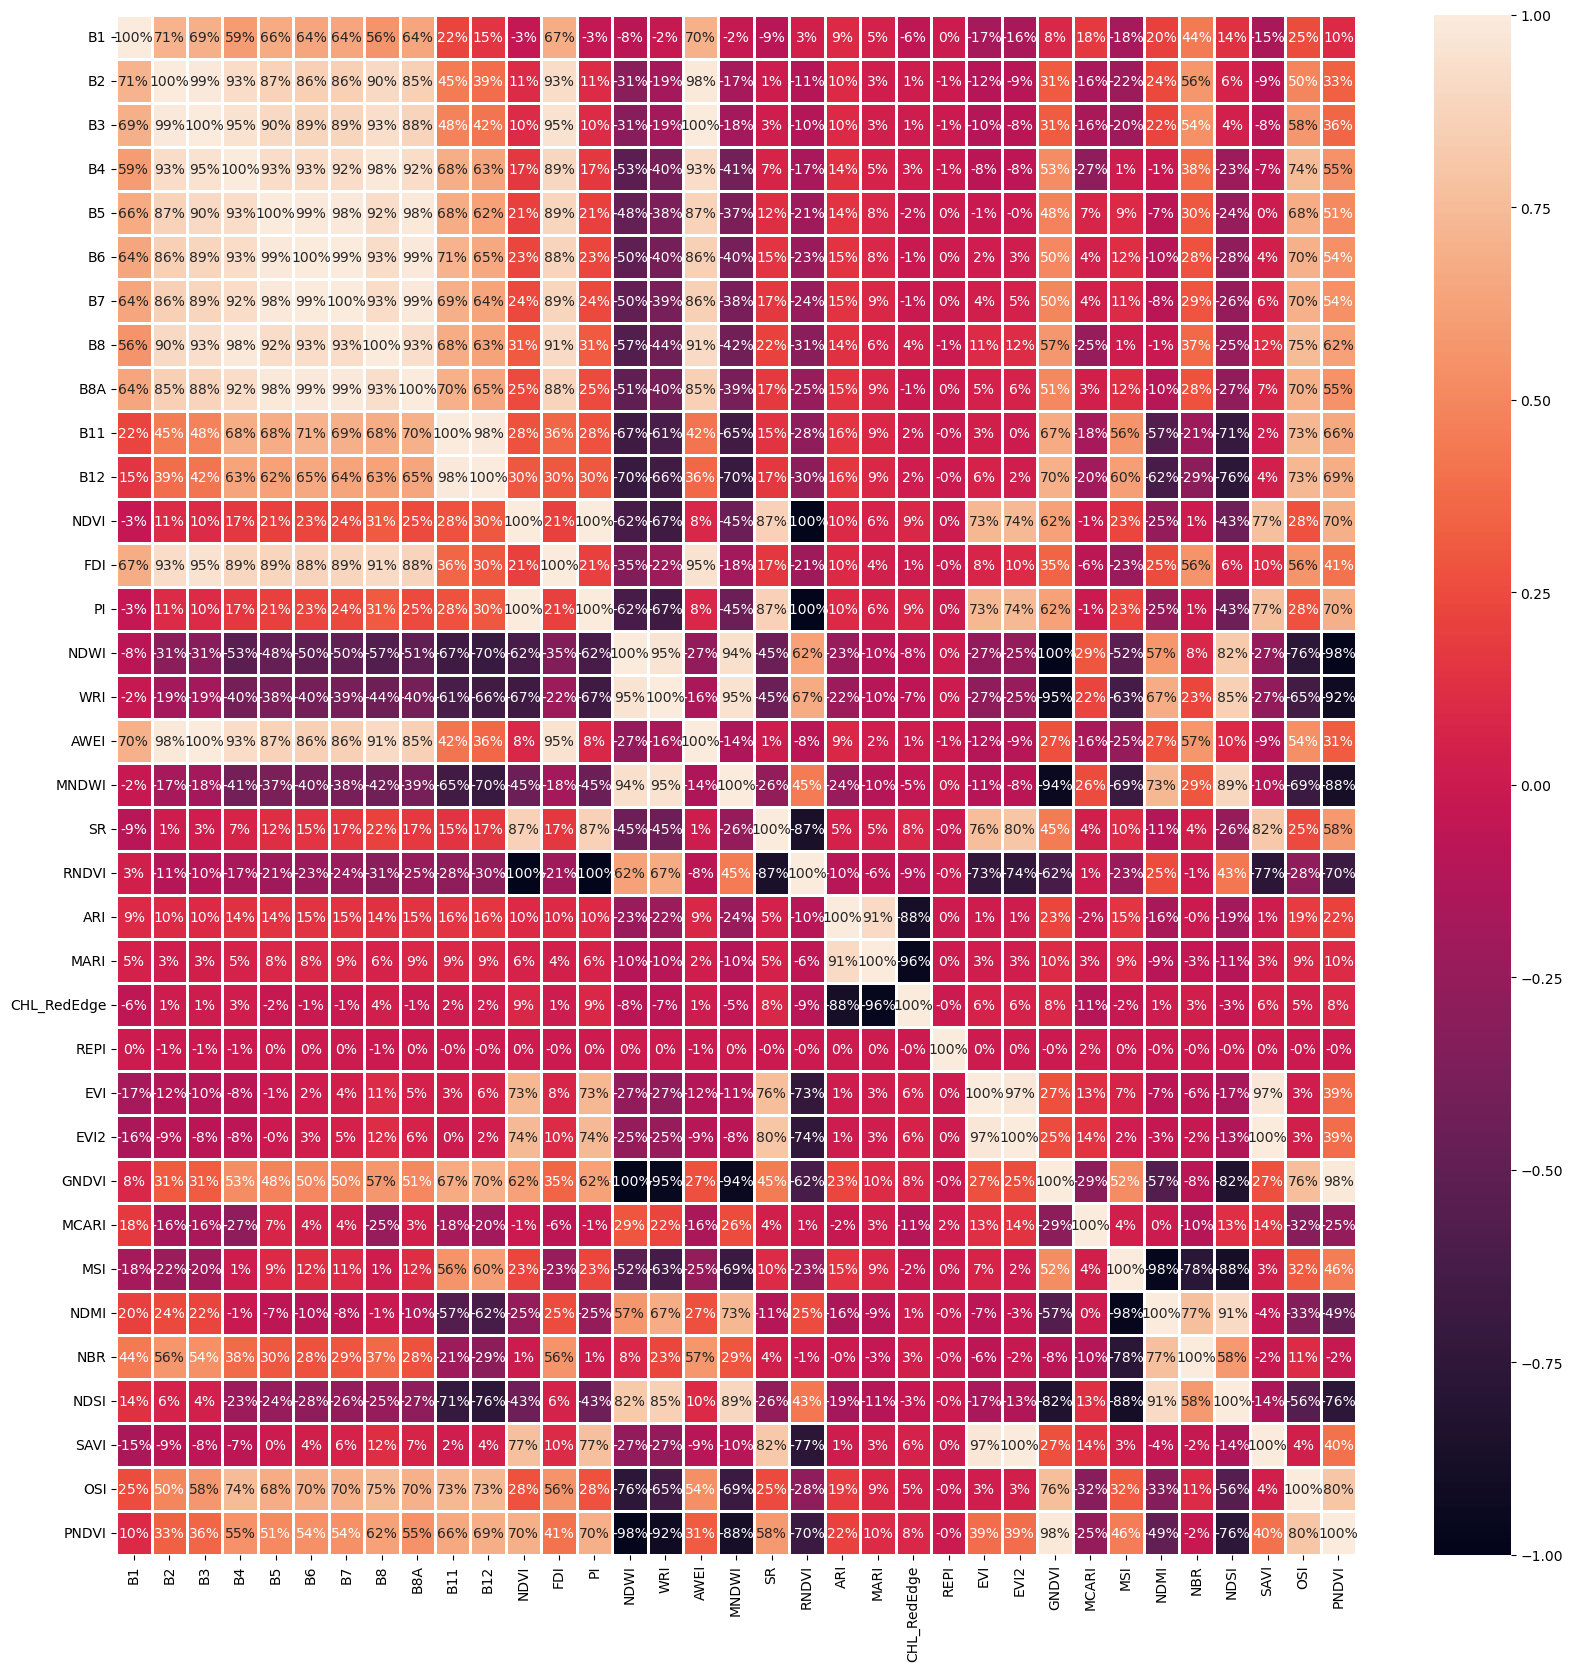

In [5]:
df.iloc[:,1:36].corr()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:36].corr(),linewidth=1,annot=True,fmt=".0%")

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense

In [7]:
x=df.drop('label',axis=1)
y=df['label']

# Perform SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Standardize features
scaler = StandardScaler()
x_resampled = scaler.fit_transform(x_resampled)

In [9]:
import numpy as np
# Count the number of samples for each class in the resampled dataset
unique_classes, counts = np.unique(y_resampled, return_counts=True)
# Create a dictionary to map class labels to the number of synthetic samples created
synthetic_samples_per_class = dict(zip(unique_classes, counts))
# Print the number of synthetic samples for each class
for class_label, count in synthetic_samples_per_class.items():
    print(f"Class {class_label}: {count} synthetic samples")

Class 0: 31098 synthetic samples
Class 1: 31098 synthetic samples
Class 2: 31098 synthetic samples
Class 3: 31098 synthetic samples
Class 4: 31098 synthetic samples
Class 5: 31098 synthetic samples
Class 6: 31098 synthetic samples


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import *
from keras.layers import Convolution2D, MaxPooling2D

In [ ]:
import tensorflow as tf
x_train= tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train= tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test= tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test= tf.convert_to_tensor(y_test, dtype=tf.float32)
x_train.shape
y_train.shape

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_train.shape

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test = np.reshape(y_test,(y_test.shape[0],1))
x_test.shape

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)

In [ ]:
from keras.layers import *
from keras.layers import Convolution1D, MaxPooling2D
# Define model architecture
model = Sequential()
model.add(Conv1D(64, 2, padding='same', activation='sigmoid', input_shape=(x_train.shape[1],1)))
model.add(Conv1D(64, 2, padding='same', activation='sigmoid'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(RepeatVector(n=1))
model.add(LSTM(64, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='sigmoid', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit model
#Y_train = Y_train.reshape(Y_train.shape[1], 1)
#Y_test = Y_test.reshape(Y_test.shape[1], 1)
history = model.fit(x_train, y_train_encoded, epochs=150,batch_size=64, verbose=1,validation_data=(x_test, y_test_encoded))

In [ ]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score, fbeta_score
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_test


accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-Score: {f1:.4f}')

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

kappa = cohen_kappa_score(y_test_classes, y_pred_classes)
print(f"Cohen's Kappa: {kappa:.4f}")

# Calculate F-beta Score with beta=2
beta = 2  # You can change beta as needed
fbeta = fbeta_score(y_test_classes, y_pred_classes, beta=beta, average='weighted')
print(f'F{beta}-Score: {fbeta:.4f}')

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + np.diag(conf_matrix))
FP = FP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)


mask = (FP + TN) != 0
FPR = np.where(mask, FP / (FP + TN), 0)
FNR = np.where(mask, FN / (FN + FP), 0)

'''FPR = FP / (FP + TN)
FNR = FN / (FN + FP)  # Fixed the calculation'''

print(f'False Positive Rate (FPR): {FPR[0]:.4f}')
print(f'False Negative Rate (FNR): {FNR[0]:.4f}')

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate the model
scores = model.evaluate(x_test, y_test_encoded, verbose=1)
print("Accuracy: %.4f%%" % (scores[1] * 100))